In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
cd '/Volumes/My Book/rabies_tracing_images/pv_cre_starter_cells/ML_06_15_17/vip_presynaptic_647/113_counts'

/Volumes/My Book/rabies_tracing_images/pv_cre_starter_cells/ML_06_15_17/vip_presynaptic_647/113_counts


In [23]:
region_df = pd.read_csv('./region.csv')

Text(0.5,1,'Presynaptic cells clustered by group')

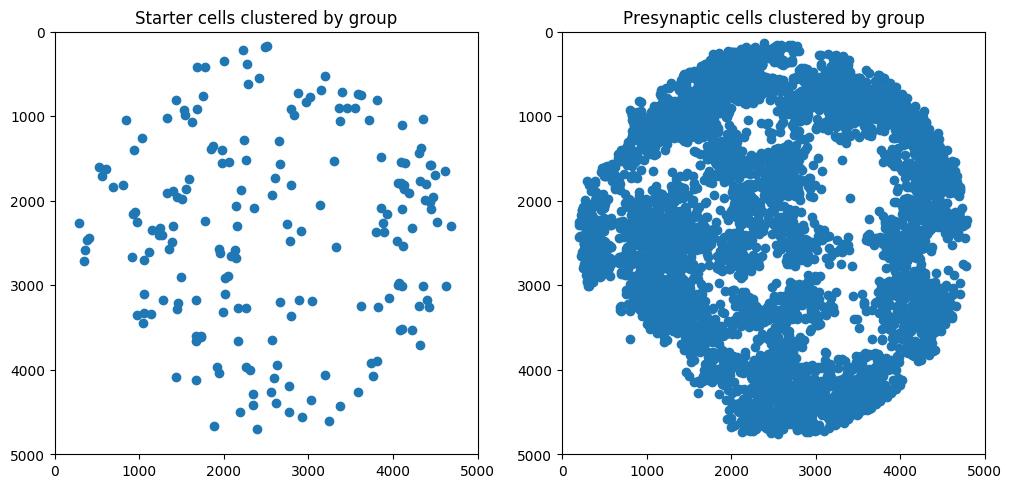

In [24]:
starter_df = region_df[region_df['starter']==1]

fig=plt.figure(figsize=(12, 12), dpi= 100, facecolor='w', edgecolor='k')
fig.add_subplot(121)

for region_id, region in starter_df.groupby('Region ID'): 
    plt.scatter(region['x'], region['y'])
    
plt.axis([0, 5000, 0, 5000])
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
plt.title("Starter cells clustered by group")
presynaptic_df = region_df[region_df['presynaptic']==1]

fig.add_subplot(122)

for region_id, region in presynaptic_df.groupby('Region ID'): 
    handle = plt.scatter(region['x'], region['y'])

plt.axis([0, 5000, 0, 5000])
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
plt.title("Presynaptic cells clustered by group")

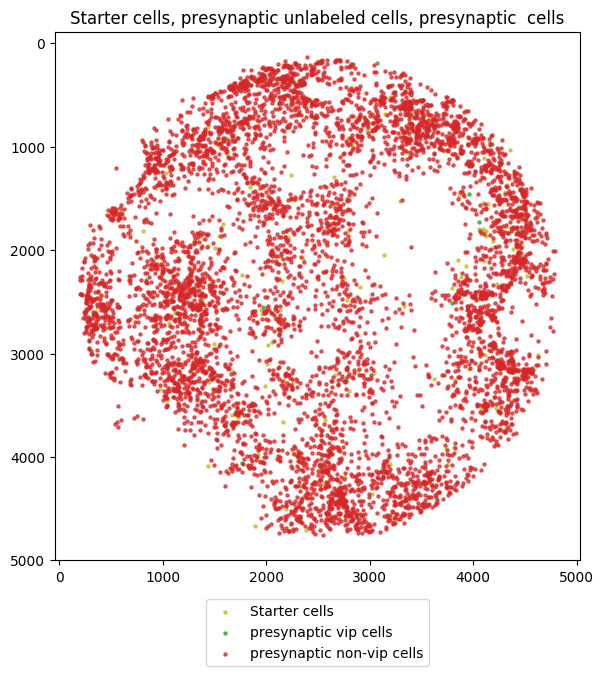

In [25]:
starter_df = region_df[region_df['starter']==1]
presynaptic_target_df = region_df[region_df['presynaptic vip']==1]
presynaptic_nontarget_df = region_df[((region_df['presynaptic vip']!=1)& (region_df['presynaptic']==1)& (region_df['starter']!=1))]

groups = zip([starter_df, presynaptic_target_df, presynaptic_nontarget_df], ['tab:olive', 'tab:green', 'tab:red'])

fig=plt.figure(figsize=(7, 7), dpi= 100, facecolor='w', edgecolor='k')
for group, color in groups:
    plt.scatter(group['x'], group['y'],s=5, c=color, alpha = 0.7)
    
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
plt.title("Starter cells, presynaptic unlabeled cells, presynaptic  cells")
plt.legend(['Starter cells', 'presynaptic vip cells', 'presynaptic non-vip cells'], 
           bbox_to_anchor=(0.5, -0.2), loc=8, borderaxespad=0.)